In [38]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

In [25]:
N = 8

In [26]:
possible_matches = [
    # {
        # double_arches_up: 0,
        # double_arches_down: 0,
        # double_spaces_a: 0,
        # double_spaces_b: 0
    # }
]

In [70]:
# Generate all possible matches:
from numpy import dtype


sequences = list( itertools.permutations( np.arange( N - 1 ) ) )
archeses = []
for sequence in sequences:
    arches = np.zeros( N, dtype=int )
    arches[ N - 1 ] = sequence[ 0 ]
    for i in range( N - 2 ):
        arches[ sequence[ i ] ] = sequence[ ( i + 1 ) % N ]
    arches[ sequence [ N - 2 ] ] = N - 1
    archeses.append( arches )

owners = set( itertools.permutations( np.hstack( [ np.zeros( int( N / 2 ), dtype=int ), np.ones( int( N / 2 ), dtype=int ) ] ) ) )

In [71]:
print( f"{len(archeses)} arches with {len(owners)} owners, i.e. {len(archeses)*len(owners)} matches" )

5040 arches with 70 owners, i.e. 352800 matches


In [76]:
def compute_points( arches, owner ):
    points = {
        'double_arches_up': 0,
        'double_arches_down': 0,
        'double_spaces_a': 0,
        'double_spaces_b': 0
    }

    # Double arches
    for i in range( N ):
        if( arches[ i ] > i ):
            if( arches[ arches[ i ] ] > arches[ i ] ):
                points[ 'double_arches_up' ] = points[ 'double_arches_up' ] + 1
        if( arches[ i ] < i ):
            if( arches[ arches[ i ] ] < arches[ i ] ):
                points[ 'double_arches_down' ] = points[ 'double_arches_down' ] + 1
    
    # Double spaces
    occupied = {
        'a' : {
            'up': np.zeros( N - 1 ),
            'down': np.zeros( N - 1 ),
        },
        'b' : {
            'up': np.zeros( N - 1 ),
            'down': np.zeros( N - 1 ),
        }
    }
    for i in range( N ):
        for j in range( np.min( [ i, arches[i] ] ), np.max( [ i, arches[i] ] ) ):
            occupied[ 'a' if owner[i] else 'b' ][ 'up' if i > arches[i] else 'down' ][ j ] = occupied[ 'a' if owner[i] else 'b' ][ 'up' if i > arches[i] else 'down' ][ j ] + 1
    points[ 'double_spaces_a' ] = np.sum( np.min( [ occupied['a']['up'], occupied['a']['down'] ], axis = 0 ) )
    points[ 'double_spaces_b' ] = np.sum( np.min( [ occupied['b']['up'], occupied['b']['down'] ], axis = 0 ) )

    return points

In [77]:
possible_matches = []

for arches in tqdm( archeses ):
    for owner in owners:
        possible_matches.append( compute_points( arches, owner ) )

100%|██████████| 5040/5040 [03:57<00:00, 21.20it/s]  


In [78]:
len( possible_matches )

352800

In [83]:
factors = [ -1, -0.5, 0, 0.5, 1 ]
win_a = np.zeros( len( factors ) )
win_b = np.zeros( len( factors ) )
pari = np.zeros( len( factors ) )

for i, f in enumerate( factors ):
    for p in possible_matches:
        pt_a = p[ 'double_arches_up' ] + f * p[ 'double_spaces_a' ] 
        pt_b = p[ 'double_arches_down' ] + f * p[ 'double_spaces_b' ]
        if( pt_a > pt_b ):
            win_a[ i ] = win_a[ i ] + 1
        if( pt_a < pt_b ):
            win_b[ i ] = win_b[ i ] + 1
        if( pt_a == pt_b ):
            pari[ i ] = pari[ i ] + 1

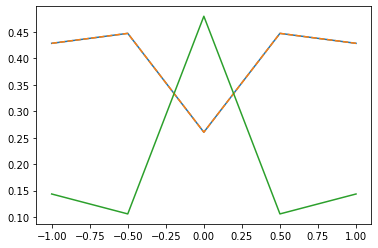

In [85]:
plt.plot( factors, win_a / len( possible_matches ) )
plt.plot( factors, win_b / len( possible_matches ), '--' )
plt.plot( factors, pari / len( possible_matches ) )

In [86]:
pari / len( possible_matches )

array([0.14360544, 0.10595238, 0.47936508, 0.10595238, 0.14360544])